# Test problem for Ag Package (Agwater1)

#### Based on SFR2 test problem 2, model is run outside of notebook

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
import numpy as np
import pandas as pd
import datetime
from Figures import ReportFigures
from matplotlib import cm
from arcpy import env
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

In [2]:
rf = ReportFigures()
rf.set_style()
sys.path.append('..')
python_exe = sys.executable

### Plot inflow to stream entering model (seg1.tab)

In [3]:
# calculate number of lines in file
num_lines = 0
with open(r"..\seg1_high.tab", 'r') as f:
    for line in f:
        num_lines += 1

#open segment 1 tabfile
fname1 = open(r"..\seg1_high.tab","r")
fname2 = open(r"..\seg1_low.tab","r")

seg1_high, seg1_low, = [], []
    
# Read flows
lines=fname1.readlines()
# set flows
for line in lines:
    seg1_high.append(line.split()[1])
fname1.close()
# Read flows
lines=fname2.readlines()
# set flows
for line in lines:
    seg1_low.append(line.split()[1])
fname2.close()

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 57 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


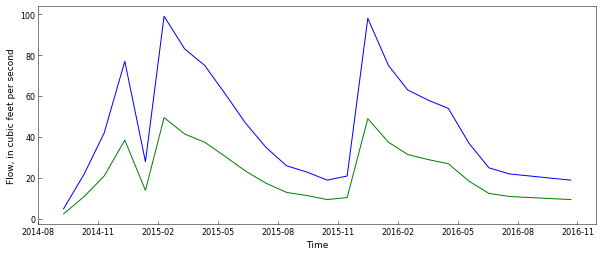

In [4]:
# set list of months
nummonths = num_lines
date_list = list()
for i in range(0, nummonths):
    date_list.append(datetime.date(2014, 10, 1)+relativedelta(months=i))

# plot inflows
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%Y-%m')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x = plt.gca().xaxis
x.set_major_locator(locator)
# Specify formatter
x.set_major_formatter(fmt)
ax.plot(date_list,seg1_high,color='b', linewidth=1.0)
ax.plot(date_list,seg1_low,color='g', linewidth=1.0)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 90.0))
ax.set_ylabel('Flow, in cubic feet per second')
ax.set_xlabel('Time')

### Get size of gage files and set start and end dates for plotting

In [5]:
# calculate number of lines in file can be any gage file
num_lines = 0
with open(r"..\Agwater1SW_high.ts9", 'r') as f:
    for line in f:
        num_lines += 1

# set dates for daily values; this date is simulation starte date
dates = []
for i in range(num_lines-1): 
    dates.append(datetime.date(2014, 10, 1)+datetime.timedelta(days=i))
    
# set start and end dates for plot 
startdate, enddate, plotdates = [], [], []
startdate.append(datetime.date(2014, 10, 1))
enddate.append(datetime.date(2016, 9, 30))

### Read and process the Ag diversion segment gage file for high field K

In [6]:

#open irrigation segment file again to read lines
fname = open(r"..\Agwater1SW_high.ts9","r")
#set firstline for headers
firstline=fname.readline()
# store all data from file in lines
lines=fname.readlines()
x, y1_high, y2_high, y3_high = [], [], [], []
# set variabes for plotting between startdate and enddate
i=-1
y1=0.0
for line in lines:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        plotdates.append(dates[i])
        y1_high.append(line.split()[4])
        y2_high.append(line.split()[5])
        y3_high.append(line.split()[6])   
        
x=np.array(y1_high,dtype=float)
y1_high_cum=x.cumsum()
x=np.array(y2_high,dtype=float)
y2_high_cum=x.cumsum()
x=np.array(y3_high,dtype=float)
y3_high_cum=x.cumsum()
            
        
# close irrigation segment file
fname.close()
header=[]

# set headers for plot legend
header.append(firstline.split()[0])
header.append(firstline.split()[1])
header.append(firstline.split()[2])
header.append(firstline.split()[3])
header.append(firstline.split()[4])
header.append(firstline.split()[5])
header.append(firstline.split()[6])

### Read and process the Ag diversion segment gage file for low Kc value

In [7]:
#open irrigation segment file again to read lines
fname = open(r"..\Agwater1SW_low.ts9","r")
#set firstline for headers
firstline=fname.readline()
# store all data from file in lines
lines=fname.readlines()
x, y1_low, y2_low, y3_low = [], [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low.append(line.split()[4])
        y2_low.append(line.split()[5])
        y3_low.append(line.split()[6])
        
x=np.array(y1_low,dtype=float)
y1_low_cum=x.cumsum()
x=np.array(y2_low,dtype=float)
y2_low_cum=x.cumsum()
x=np.array(y3_low,dtype=float)
y3_low_cum=x.cumsum()
# close irrigation segment file
fname.close()

### Read and process the Ag  segment ET gage file for High Kc value

In [8]:
#open SW ET file to read lines
fname = open(r"..\Agwater1SW_ET_high.ts9","r")
#set firstline for headers
firstlineet=fname.readline()
# set headers for plot legend
header2=[]
header2.append(firstlineet.split()[0])
header2.append(firstlineet.split()[1])
header2.append(firstlineet.split()[2])
header2.append(firstlineet.split()[3])
header2.append(firstlineet.split()[4])
header2.append(firstlineet.split()[5])
header2.append(firstlineet.split()[6])
# store all data from file in lines
lineset=fname.readlines()
xet, y1et_high, y2et_high, y3et_high = [], [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_high.append(line.split()[4])
        y2et_high.append(line.split()[5])
# close SW ET file
fname.close()

### Read and process the Ag  segment ET gage file for Low Kc value

In [9]:
#open SW ET file to read lines
fname = open(r"..\Agwater1SW_ET_low.ts9","r")
#set firstline for headers
firstlineet=fname.readline()
# store all data from file in lines
lineset=fname.readlines()
xet, y1et_low, y2et_low, y3et_low = [], [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low.append(line.split()[4])
        y2et_low.append(line.split()[5])
# close SW ET file
fname.close()

### Plot water right and diversion amount for Low and flow years

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 67 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


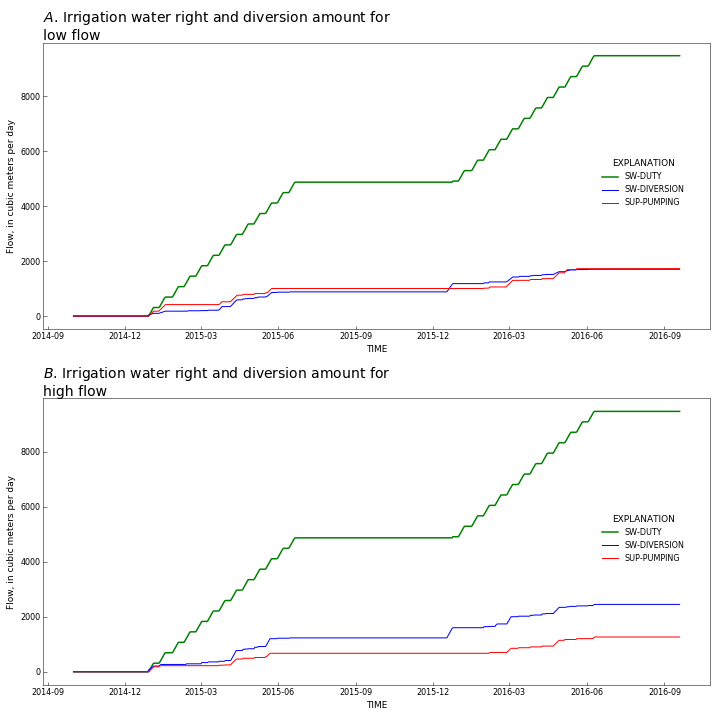

In [10]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.flat
axes[0].plot(plotdates,y1_low_cum,color='g', linewidth=1.5, label=header[4])
axes[0].plot(plotdates,y2_low_cum,color='b', linewidth=1.0, label=header[5])
axes[0].plot(plotdates,y3_low_cum,color='r', linewidth=1.0, label=header[6])

axes[1].plot(plotdates,y1_high_cum,color='g', linewidth=1.5, label=header[4])
axes[1].plot(plotdates,y2_high_cum,color='b', linewidth=1.0, label=header[5])
axes[1].plot(plotdates,y3_high_cum,color='r', linewidth=1.0, label=header[6])

axes[0].set_ylabel('Flow, in cubic meters per day')
axes[0].set_xlabel(header[0])

plt.ylabel('Flow, in cubic meters per day')
plt.xlabel(header[0])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 90.0))

rf.title(axes[0], 'Irrigation water right and diversion amount for low flow', subplot_prefix='A')

#rf.axes_numbering(axes[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axes[1], 'Irrigation water right and diversion amount for high flow', subplot_prefix='B')

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
rf.legend(axes[0], handles, labels, bbox_to_anchor=(.9, 0.4))

# Set legend
handles, labels = axes[1].get_legend_handles_labels()
rf.legend(axes[1], handles, labels, bbox_to_anchor=(.9, 0.4))

plt.tight_layout()
plt.savefig('WR_inflowcomp.pdf')

### Plot well-watered and actual ET for Low and High inflows

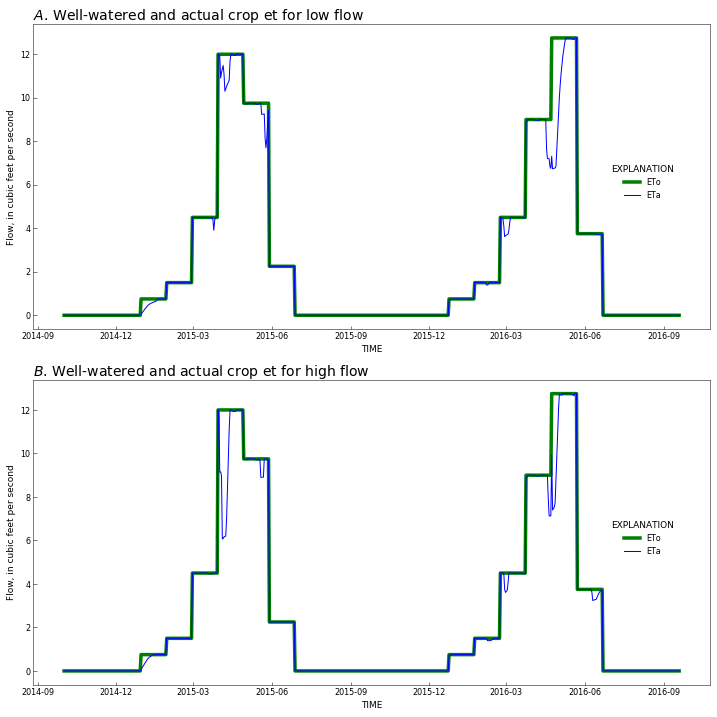

In [11]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.flat
axes[0].plot(plotdates,y1et_low,color='g', linewidth=3.5, label=header2[4])
axes[0].plot(plotdates,y2et_low,color='b', linewidth=1.0, label=header2[5])

axes[1].plot(plotdates,y1et_high,color='g', linewidth=3.5, label=header2[4])
axes[1].plot(plotdates,y2et_high,color='b', linewidth=1.0, label=header2[5])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 90.0))

axes[0].set_ylabel('Flow, in cubic feet per second')
axes[0].set_xlabel(header2[0])

plt.ylabel('Flow, in cubic feet per second')
plt.xlabel(header2[0])

rf.title(axes[0], 'Well-watered and actual crop ET for low flow', subplot_prefix='A')

#rf.axes_numbering(axes[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axes[1], 'Well-watered and actual crop ET for high flow', subplot_prefix='B')

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
rf.legend(axes[0], handles, labels, bbox_to_anchor=(.9, 0.4))

# Set legend
handles, labels = axes[1].get_legend_handles_labels()
rf.legend(axes[1], handles, labels, bbox_to_anchor=(.9, 0.4))


plt.tight_layout()
plt.savefig('ET_fllowcomp.pdf')